In [21]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [22]:
X=load_wine()['data']
y=load_wine()['target']

In [23]:
tree=DecisionTreeClassifier()
svm=SVC(probability=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(probability=True)

In [26]:
tree.score(X_test,y_test), svm.score(X_test, y_test)

(0.8888888888888888, 0.6)

In [27]:
tree=DecisionTreeClassifier()
svm=SVC(probability=True, kernel='linear')

In [28]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9333333333333333

In [29]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9555555555555556

In [30]:
tree_predict=tree.predict_proba(X_test)
svm_predict=svm.predict_proba(X_test)
soft_vote_predict=tree_predict+svm_predict

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
predict=np.argmax(soft_vote_predict, axis=1)

In [31]:
accuracy_score(predict, y_test)

0.9333333333333333

In [32]:
confusion_matrix(predict, y_test)

array([[15,  0,  0],
       [ 1, 13,  1],
       [ 0,  1, 14]], dtype=int64)

In [33]:
f1_score(y_test, predict, average='macro')

0.932542330985045

In [34]:
# !pip install tensorflow #설치 5분 넘게 걸림

In [35]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
import matplotlib.pyplot as plt


In [36]:
(X,y),(X_test,y_test) = mnist.load_data()

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X,y)

In [38]:
model=Sequential(
    [
        Input(shape=(28,28,)),
        Flatten(),
        Dense(34, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax'),
        
    ]
)

In [39]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


In [50]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train, y_train, epochs=10, validation_data=(X_val, y_val)
)

Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1129 - accuracy: 0.9706 - val_loss: 0.2130 - val_accuracy: 0.9544
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1151 - accuracy: 0.9708 - val_loss: 0.2289 - val_accuracy: 0.9527
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0993 - accuracy: 0.9738 - val_loss: 0.2301 - val_accuracy: 0.9532
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0978 - accuracy: 0.9745 - val_loss: 0.2382 - val_accuracy: 0.9523
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0932 - accuracy: 0.9762 - val_loss: 0.2475 - val_accuracy: 0.9519
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0965 - accuracy: 0.9742 - val_loss: 0.2414 - val_accuracy: 0.9527
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0981 - accuracy: 0.9744 - val_loss: 0.2746 - val_accuracy:

In [51]:
# model.evaluate(X_test, y_test)

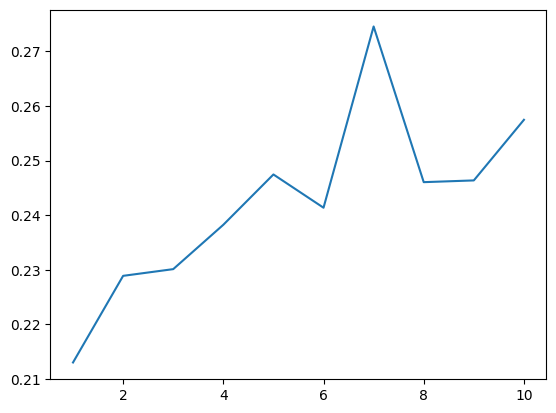

In [54]:
model.history.history
plt.plot(np.arange(1,11), model.history.history['val_loss'])

In [55]:
import pandas as pd

In [56]:
data=pd.read_csv('c:/work2023/230516/player.csv')

In [57]:
data

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [58]:
data=pd.DataFrame(data)

In [59]:
np.unique(data.play)

array(['no', 'yes'], dtype=object)

In [60]:
pk_no=np.sum(data.play=='no')/len(data.play)
pk_yes=np.sum(data.play=='yes')/len(data.play)

In [61]:
-(pk_no*np.log2(pk_no)+pk_yes*np.log2(pk_yes))  #엔드토피 지수

0.9402859586706311

In [62]:
np.unique(data.play, return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9], dtype=int64))

In [63]:
def entropy(x):
    return np.unique(x, return_counts=True)[1]/len(x)

In [64]:
entropy(data.play)

array([0.35714286, 0.64285714])

In [65]:
def entropy(x):
    prob=np.unique(x, return_counts=True)[1]/len(x) 
    entropy_=-np.sum(prob*np.log2(prob))
    return entropy_
# entropy: 불순도(impurity)를 수치적으로 나타낸 것임
# 결정 트리는 불순도를 최소화(=순도 최대화)하는 방향으로 학습시킴
# entropy = -∑pi*log2(pi)
# where pi : 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터 비율 
#return_counts=True 중복되는 배열도 반환(=False :  중복되는 배열 빼고 반환)

In [66]:
x=data.loc[data.play=='yes', 'play']

In [67]:
entropy(x)

-0.0

In [68]:
data.play.value_counts()

play
yes    9
no     5
Name: count, dtype: int64

In [69]:
data_YesOrNo=['yes']*5+['no']*5
data

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [70]:
data_YesOrNo=np.array(data_YesOrNo)

In [71]:
entropy(data_YesOrNo)  ##반반일땐 entropy : 1.0

1.0

In [72]:
data_YesOrNo

array(['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no'],
      dtype='<U3')

In [73]:
entropy(data.play)

0.9402859586706311

In [74]:
np.unique(data.outlook)

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [75]:
data.loc[data.outlook=='overcast']

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes


In [76]:
entropy(data.loc[data.outlook=='overcast', 'play'])

-0.0

In [77]:
np.unique(data.outlook, return_counts=True)

(array(['overcast', 'rainy', 'sunny'], dtype=object),
 array([4, 5, 5], dtype=int64))

In [78]:
4/14*entropy(data.loc[data.outlook=='overcast', 'play'])

-0.0

In [79]:
5/14*entropy(data.loc[data.outlook=='rainy', 'play'])

0.3467680694480959

In [80]:
5/14*entropy(data.loc[data.outlook=='sunny', 'play'])

0.3467680694480959

In [81]:
def info_gain(data, x, y):
    total=entropy(data[y])
    vals, counts = np.unique(data[x], return_counts=True)
    gain=[count/len(data)*entropy(data.loc[data[x]==val, y]) \
        for val, count in zip(vals, counts)]
    return \
        total - np.sum(gain)
        
    # return 아래와 같은 의미
    # entropy(data.play)-\
    # (4/14*entropy(data.loc[data.outlook=='overcast', 'play'])+\
    # 5/14*entropy(data.loc[data.outlook=='rainy', 'play'])+\
    # 5/14*entropy(data.loc[data.outlook=='sunny', 'play']))


In [82]:
info_gain(data, 'outlook', 'play')

0.24674981977443933

In [83]:
info_gain(data, 'temperature', 'play')

0.02922256565895487

In [84]:
info_gain(data, 'windy', 'play')

0.04812703040826949

In [85]:
def max_gain(data, x, y):
    return x[np.argmax([info_gain(data, i, y) for i in x])]

In [86]:
features=data.columns[:-1]
target=data.columns[-1]

In [87]:
max_gain(data, features, target )

'outlook'

In [88]:
data.loc[data.outlook == 'rainy', :]

,outlook,temperature,humidity,windy,play
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no


In [89]:
sub_data=data.loc[data.outlook == 'sunny', :]
max_gain(sub_data, features, target)

'humidity'

In [90]:
np.unique(data.humidity)

array(['high', 'normal'], dtype=object)

In [91]:
sub_data = sub_data.loc[sub_data.humidity == 'high', 'play']

In [92]:
sub_data

9     no
10    no
11    no
Name: play, dtype: object

In [93]:
def entropy(x):
    px=np.unique(x, return_counts=True)[1]/len(x)
    # px=x.value_counts()/np.sum(x.value_counts())
    return -np.sum(px*np.log2(px))

def info_gain(data, x, y):
    total = entropy(data[y])
    vals, counts = np.unique(x, return_counts=True)
    gain = [count/len(data)*entropy(data.loc[data[x]==val, y]) \
        for val, count in zip(vals, counts) ]
    return total-gain

def max_gain(data, x, y):
    return x[np.argmax([info_gain(data, i, y) for i in x])]

In [94]:
data.play.value_counts()

play
yes    9
no     5
Name: count, dtype: int64

In [95]:
#tree grow 트리모델 성장시키기 - 값이 맞는지 

In [96]:
#재귀함수 만드는 tip 
# : try 하면서 오류나면 계속 고치면서 하기

In [97]:
def make_tree(data, x, y):
    best_feature = max_gain(data,x,y)
    tree={best_feature:{}}
    return tree

In [98]:
def make_tree(data,x,y):
    best_feature = max_gain(data,x,y)
    columns = x[ x != best_feature]
    tree = {best_feature:{}}
    for val in np.unique(data[best_feature]):
        sub_data = data.loc[data[best_feature] == val, :]
        sub_tree = make_tree(sub_data,columns,y)
        tree[best_feature][val] = sub_tree
    return tree

In [99]:
def make_tree(data, x, y):
    try:
        if np.unique(data[y]).size==1:
            return np.unique(data[y])[0]
        best_feature = max_gain(data,x,y)
        columns=x[x != best_feature]
        tree={best_feature:{}}
        for val in np.unique(data[best_feature]):
            sub_data=data.loc[data[best_feature]==val, :]
            sub_tree=make_tree(sub_data, columns, y)
            tree[best_feature][val] = sub_tree
        return tree
    except Exception as e:
        print(e)

In [100]:
features=data.columns[:1]
target=data.columns[-1]
make_tree(data, features, target)

attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence


{'outlook': {'overcast': 'yes', 'rainy': None, 'sunny': None}}

In [101]:
from pprint import pprint

In [102]:
pprint(make_tree(data,features,target))

attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
{'outlook': {'overcast': 'yes', 'rainy': None, 'sunny': None}}


In [103]:
data=\
{'no_insects': {0: True,
  1: True,
  2: True,
  3: False,
  4: True,
  5: True,
  6: True,
  7: True,
  8: True,
  9: False},
 'no_dead': {0: True,
  1: True,
  2: False,
  3: True,
  4: True,
  5: True,
  6: False,
  7: False,
  8: True,
  9: False},
 'no_wilting': {0: True,
  1: True,
  2: True,
  3: True,
  4: True,
  5: True,
  6: False,
  7: True,
  8: True,
  9: True},
 'no_diseases': {0: True,
  1: True,
  2: False,
  3: True,
  4: True,
  5: True,
  6: False,
  7: False,
  8: True,
  9: True},
 'tree_health': {0: 'Good',
  1: 'Good',
  2: 'Poor',
  3: 'Good',
  4: 'Good',
  5: 'Good',
  6: 'Poor',
  7: 'Poor',
  8: 'Good',
  9: 'Poor'}}

In [104]:
data=pd.DataFrame(data)

In [105]:
data.to_csv('./tree.csv')

In [106]:
data = pd.read_csv('./tree.csv')

In [107]:
data.iloc[:,1:]

,no_insects,no_dead,no_wilting,no_diseases,tree_health
0,True,True,True,True,Good
1,True,True,True,True,Good
2,True,False,True,False,Poor
3,False,True,True,True,Good
4,True,True,True,True,Good
5,True,True,True,True,Good
6,True,False,False,False,Poor
7,True,False,True,False,Poor
8,True,True,True,True,Good
9,False,False,True,True,Poor


In [108]:
data.columns

Index(['Unnamed: 0', 'no_insects', 'no_dead', 'no_wilting', 'no_diseases',
       'tree_health'],
      dtype='object')

In [109]:
data=data.drop(columns='Unnamed: 0')
data.columns

Index(['no_insects', 'no_dead', 'no_wilting', 'no_diseases', 'tree_health'], dtype='object')

In [110]:
features = np.array(['no_insects', 'no_wilting','no_diseases'])
target = 'tree_health'

In [111]:
np.unique(data['no_insects'])[0]

False

In [112]:
np.random.seed(100)
X = np.random.randint(10,100,size=(50,5))
y = np.random.choice([0,1], 50)
df = pd.DataFrame(np.c_[X,y])

In [113]:
df

,0,1,2,3,4,5
0,18,34,77,97,89,0
1,58,20,62,63,76,0
2,24,44,34,25,70,1
3,68,26,19,96,12,0
4,37,14,41,11,23,1
5,93,14,69,77,17,1
6,59,57,75,71,24,0
7,65,81,90,12,29,0
8,73,63,37,66,40,0
9,58,57,49,48,54,1


In [114]:
# df.rename({ i:'col_'+str(i) for i in df.columns},axis=1,inplace=True)
# df.rename({'col_5':'target'},axis='columns', inplace=True)
df

,0,1,2,3,4,5
0,18,34,77,97,89,0
1,58,20,62,63,76,0
2,24,44,34,25,70,1
3,68,26,19,96,12,0
4,37,14,41,11,23,1
5,93,14,69,77,17,1
6,59,57,75,71,24,0
7,65,81,90,12,29,0
8,73,63,37,66,40,0
9,58,57,49,48,54,1


In [115]:
X = df.iloc[:,:-1].apply(lambda x:  x >= 50)
y = df.iloc[:,-1]
df = pd.concat([X,y],axis=1)

In [116]:
pprint(make_tree(df, df.columns[:-1], df.columns[-1]))

attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
{2: {False: {3: {False: {0: {False: 1, True: {4: {False: 0, True: 1}}}},
                 True: {4: {False: {0: {False: {1: {False: 1, True: None}},
                                        True: {1: {False: 0, True: None}}}},
                            True: {1: {True: {0: {False: None, True: 0}}}}}}}},
     True: {3: {False: {4: {False: {0: {True: {1: {False: 0, True: None}}}},
                            True: {1: {False: 0, True: 1}}}},
                True: {4: {False: {0: {False: {1: {False: None, True: 1}},
                                       True: {1: {False: None, True: 0}}}},
                           True: {1: {False: {0: {False: 0, True: None}},
                             

In [117]:
def make_tree(data,x,y):
    try:
        if np.unique(data[y]).size == 1:
            return np.unique(data[y])[0]
        elif len(data) == 0:
            return 'case 1'
        elif len(x) == 0:
            return 'case 2'
        
        best_feature = max_gain(data,x,y)
        columns = x[x != best_feature]
        tree = {best_feature:{}}
        for val in np.unique(data[best_feature]):
            sub_data = data.loc[data[best_feature] == val, :]
            sub_tree = make_tree(sub_data,columns,y)
            tree[best_feature][val] = sub_tree
        return tree
    except Exception as e:
        print(e)

In [118]:
def make_tree(data,x,y,parent_class=None):
    try:
        if np.unique(data[y]).size == 1:
            return np.unique(data[y])[0]
        elif len(data) == 0:
            return 'case 1'
        elif len(x) == 0:
            return parent_class
        best_feature = max_gain(data,x,y)
        columns = x[ x != best_feature]
        tree = {best_feature:{}}
        for val in np.unique(data[best_feature]):
            vals, counts = np.unique(data.loc[data[best_feature],y],return_counts=True)
            parent_class = vals[np.argmax(counts)]
            sub_data = data.loc[data[best_feature] == val, :]
            sub_tree = make_tree(sub_data,columns,y,parent_class)
            tree[best_feature][val] = sub_tree
        return tree
    except Exception as e:
        print(e)

In [119]:
features = np.array(['no_insects', 'no_wilting','no_diseases'])
target = 'tree_health'
pprint(make_tree(data,features,target))

{'no_insects': {False: {'no_wilting': {True: {'no_diseases': {True: 'Good'}}}},
                True: {'no_wilting': {False: 'Poor',
                                      True: {'no_diseases': {False: 'Poor',
                                                             True: 'Good'}}}}}}


In [120]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerb

In [121]:
data.loc[(data['no_diseases'] == True) & (data['no_insects'] == False) &
         (data['no_wilting'])==True,:]

,no_insects,no_dead,no_wilting,no_diseases,tree_health
3,False,True,True,True,Good
9,False,False,True,True,Poor


In [122]:
x = pd.DataFrame(
    {
        'no_insects':[False],
        'no_dead':[True],
        'no_wilting':[True],
        'no_diseases':[True],
        'tree_health':['Poor']
    }
)

In [123]:
data = pd.concat([data,x])

In [124]:
aa = data.loc[(data['no_diseases'] == True) & (data['no_insects'] == False),:]

In [125]:
np.unique(aa['tree_health'])[np.argmax(np.unique(aa['tree_health'],return_counts=True)[1])]

'Poor'

In [126]:
np.unique(data['tree_health'],return_counts=True)

(array(['Good', 'Poor'], dtype=object), array([6, 5], dtype=int64))